In [1]:
import pandas as pd
import numpy as np

In [2]:
locations = ['LA','NY','SF','SG','SV','HK', 'Taipei', 'Tokyo']
df = pd.DataFrame()
for i in range (len(locations)):
    for week in range (1,8):
        file_name = "./2016/Anon Week " + str(week) + " Feedback - " + str(locations[i]) + ".csv"
        #print(file_name)
        try:
            new_df = pd.read_csv(file_name)
            new_df["Location"] = locations[i]
            new_df['Week'] = week
            df = pd.concat([df,new_df], ignore_index=True)
        except (FileNotFoundError):
            print(file_name)
    
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Timestamp', axis=1)
df = df.round({'How well is the schedule paced?':0})
df


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


./2016/Anon Week 7 Feedback - SG.csv
./2016/Anon Week 1 Feedback - HK.csv
./2016/Anon Week 2 Feedback - HK.csv
./2016/Anon Week 3 Feedback - HK.csv
./2016/Anon Week 4 Feedback - HK.csv
./2016/Anon Week 7 Feedback - HK.csv
./2016/Anon Week 1 Feedback - Taipei.csv
./2016/Anon Week 2 Feedback - Taipei.csv
./2016/Anon Week 3 Feedback - Taipei.csv
./2016/Anon Week 4 Feedback - Taipei.csv
./2016/Anon Week 5 Feedback - Taipei.csv
./2016/Anon Week 1 Feedback - Tokyo.csv
./2016/Anon Week 2 Feedback - Tokyo.csv
./2016/Anon Week 3 Feedback - Tokyo.csv
./2016/Anon Week 4 Feedback - Tokyo.csv
./2016/Anon Week 5 Feedback - Tokyo.csv
./2016/Anon Week 7 Feedback - Tokyo.csv


,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Week,What track are you in?
0,4.0,NaN,3,LA,1,NaN
1,4.0,NaN,4,LA,1,NaN
2,4.0,NaN,4,LA,1,NaN
3,4.0,NaN,4,LA,1,NaN
4,5.0,NaN,4,LA,1,NaN
5,4.0,NaN,5,LA,1,NaN
6,3.0,NaN,5,LA,1,NaN
7,NaN,2,4,LA,2,NaN
8,NaN,3,3,LA,2,NaN
9,NaN,4,4,LA,2,NaN


### Clean Confounding Pacing Data and Merge Schedule-Pacing and Tutorial-Pacing Columns

In [3]:
def clean_combine_pacing(df):
    # Drop confounding #REF! value
    df = df[df["How well is the schedule paced?"] != "#REF!"]

    # Replace NaNs with zero-values
    df["How well are the tutorials paced?"] = df["How well are the tutorials paced?"].fillna(0).astype(int)
    df["How well is the schedule paced?"] = df["How well is the schedule paced?"].fillna(0).astype(int)

    # Merge both columns into new column "Pacing"
    df["Pacing"] = (df["How well are the tutorials paced?"] + df["How well is the schedule paced?"]) * 2
    df.drop(columns=["How well are the tutorials paced?", "How well is the schedule paced?"], inplace=True)
    
    return df

### NOTE: Run the cell below _once_ to clean and combine _Pacing_ data!

In [4]:
# np.nan --> int(0)
#            int(-1)
#            float(0.0)
#            str("None")
#            bool(False)

In [5]:
df = clean_combine_pacing(df)
df

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Week,What track are you in?,Pacing
0,3,LA,1,NaN,8
1,4,LA,1,NaN,8
2,4,LA,1,NaN,8
3,4,LA,1,NaN,8
4,4,LA,1,NaN,10
5,5,LA,1,NaN,8
6,5,LA,1,NaN,6
7,4,LA,2,NaN,4
8,3,LA,2,NaN,6
9,4,LA,2,NaN,8


In [7]:
df[df.Location == 'LA']['Location'].value_counts()

LA    59
Name: Location, dtype: int64

In [8]:
df.describe()

,Week,Pacing
count,926.000000,926.000000
mean,3.601512,6.565875
std,2.095544,1.360239
min,1.000000,2.000000
25%,2.000000,6.000000
50%,3.000000,6.000000
75%,5.000000,8.000000
max,7.000000,10.000000


In [9]:
df[(df['What track are you in?']=='Games') & (df["Location"] == "LA")].head()


,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Week,What track are you in?,Pacing
28,3,LA,5,Games,4
31,4,LA,5,Games,6
33,4,LA,5,Games,6
35,4,LA,5,Games,8
36,5,LA,5,Games,8


In [10]:
(df['Location']).value_counts()

SV        313
SF        295
NY        169
LA         59
SG         48
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64

In [11]:
(df['Pacing']).value_counts(dropna=False)

6     571
8     247
4      59
10     43
2       6
Name: Pacing, dtype: int64

In [12]:
# Since almost 77% percent data are missing on How well are the tutorials paced?' question (column) I can drop the
# column and not counting towards to data analysis

In [13]:
(df['What track are you in?']).value_counts(dropna=False)

Apps     395
Intro    199
Games    184
NaN      118
VR        30
Name: What track are you in?, dtype: int64

In [14]:
118/len(df['What track are you in?'])

0.12742980561555076

In [ ]:
# Observation on [Track] column. Looks like there are enough exact data [NaN] values are only [12%] 


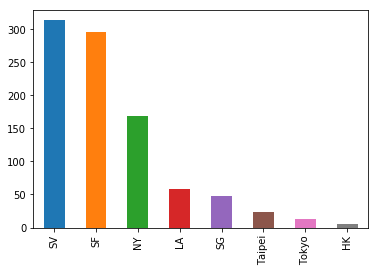

In [18]:
# Location Represention in terms of the number of submitted data 
df['Location'].value_counts().plot(kind='bar')

In [19]:
df['Location'].value_counts()

SV        313
SF        295
NY        169
LA         59
SG         48
Taipei     23
Tokyo      13
HK          6
Name: Location, dtype: int64